<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module2_Lab4_AIML_-/blob/main/MODULE2_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 : Appreciating, Interpreting and Visualizing Data

Lab 4 : t-Distributed Stochastic Neighbor Embedding(t-SNE)

In [ ]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
RS=20150101

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.0,
                rc={"lines.linewidth": 2.0})

In [ ]:
digits=load_digits()
digits.data.shape

(1797, 64)

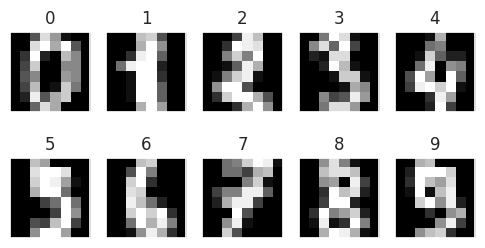

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

nrows, ncols = 2, 5
plt.figure(figsize=(6, 3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i, ...])
    plt.xticks([])
    plt.yticks([])
    plt.title(digits.target[i])
plt.show()

X = np.vstack([digits.data[digits.target == i]
              for i in range(10)])
y = np.hstack([digits.target[digits.target == i]
              for i in range(10)])

In [ ]:
digits_proj=TSNE(random_state=RS).fit_transform(X)

# Visualizing the data in the projected space

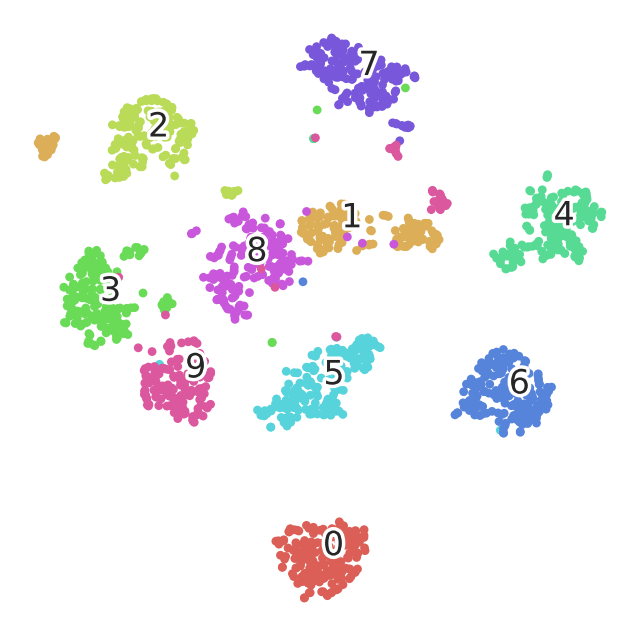

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7c786132b400>)

In [ ]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

# Tweaking some of the hyperparameters to better understand their role
Changing the PERPLEXITY values

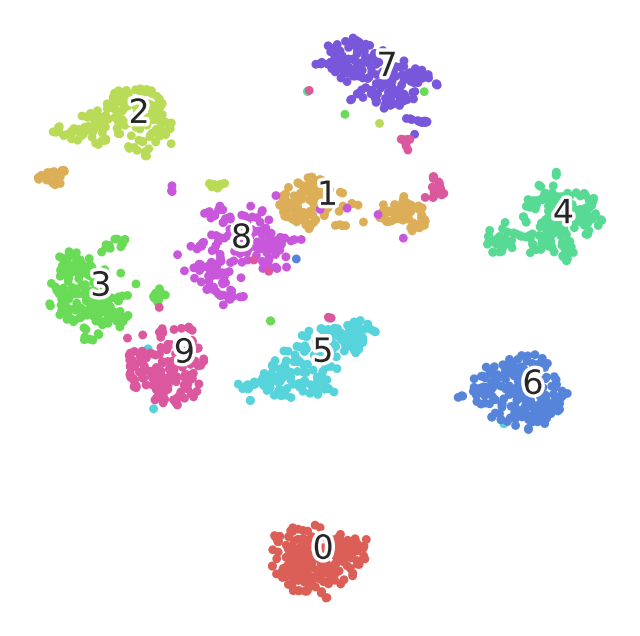

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7c7863243c70>)

In [ ]:
digits_proj=TSNE(init="pca",random_state=RS,perplexity=50).fit_transform(X)
scatter(digits_proj, y)

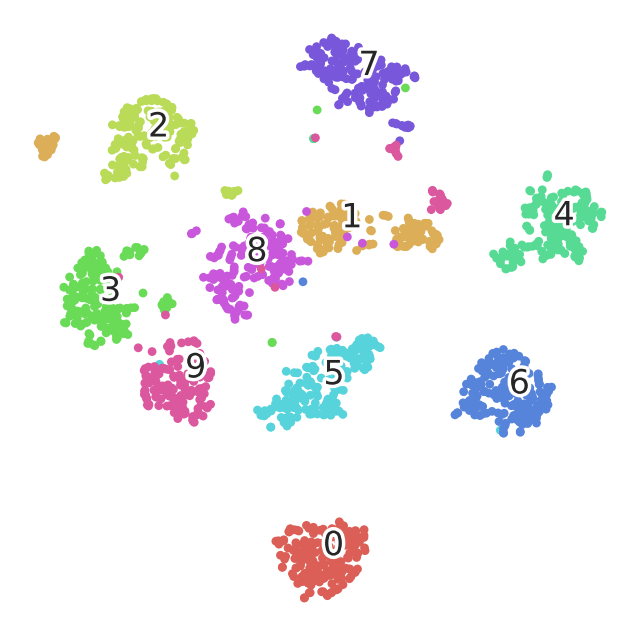

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7c78614fa830>)

In [ ]:
digits_proj=TSNE(init="pca",random_state=RS,perplexity=30).fit_transform(X)
scatter(digits_proj, y)

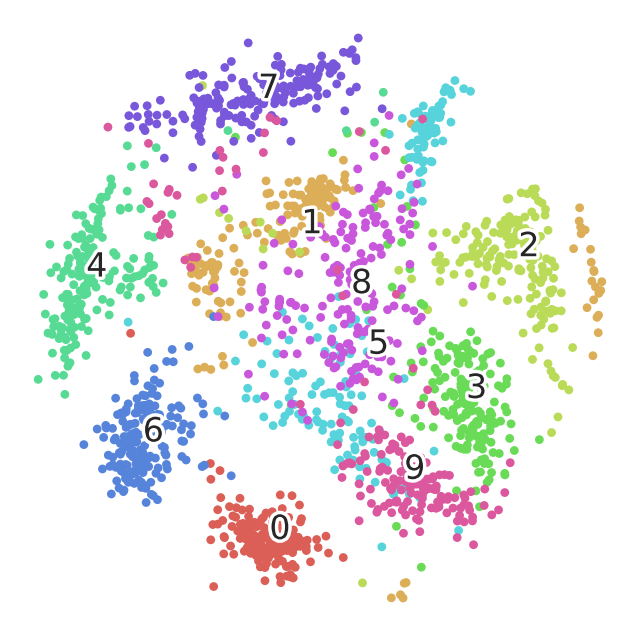

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7c785ec32b60>)

In [ ]:
digits_proj=TSNE(init="pca",random_state=RS,perplexity=1000).fit_transform(X)
scatter(digits_proj, y)

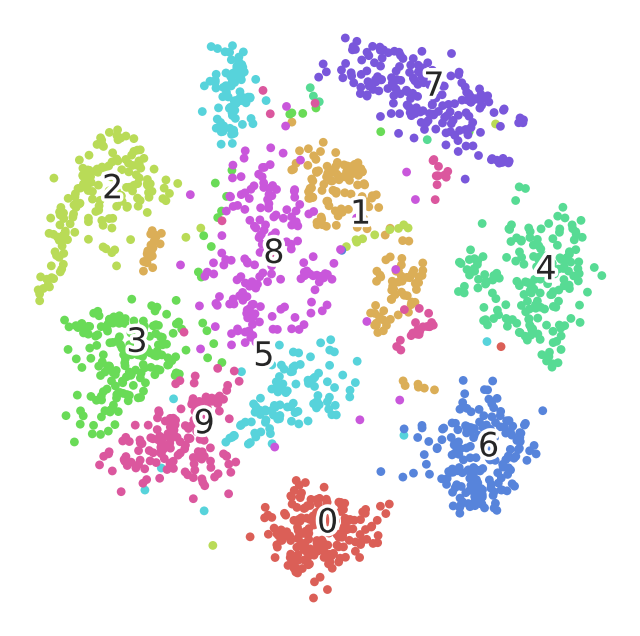

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7c7860e06b90>)

In [ ]:
digits_proj=TSNE(init="pca",random_state=RS,perplexity=500).fit_transform(X)
scatter(digits_proj, y)

# Changing the method to EXACT

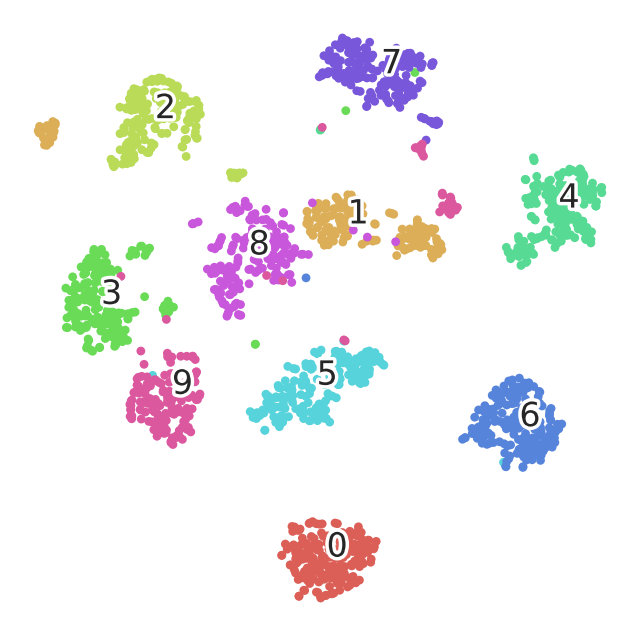

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7c7860da8070>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

# EXERCISE

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


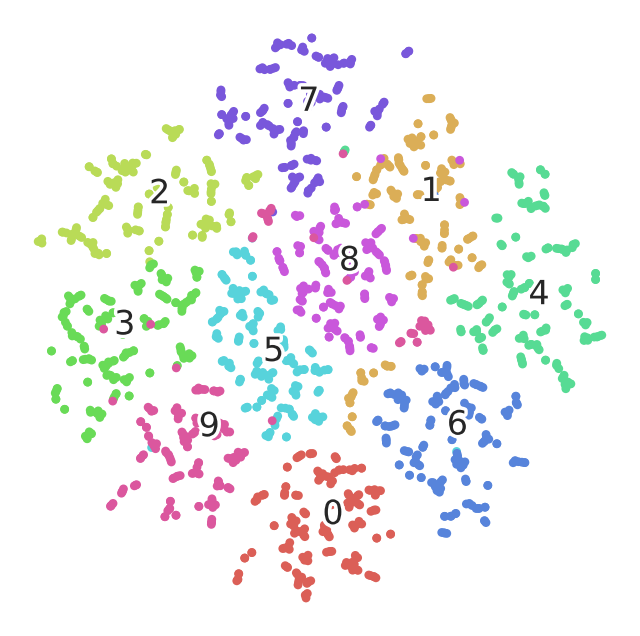

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7c785b2b3a90>)

In [ ]:
perplexity_value = 2
number_iterations =2000
method = "barnes_hut"
digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

1.  Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?

PCA is better for dimensionality reduction in preprocessing, maintaining global distances, and use in downstream modeling.
t-SNE is better for visualization and exploring non-linear structures in high-dimensional data.

a. Which of the two algorithms is linear and which one is non-linear?

PCA is Linear and t-SNE is Non-Linear

b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?

The non-linearity in t-SNE helps capture complex patterns and relationships in data that PCA (linear) cannot. It preserves local structures, making it ideal for visualizing and uncovering clusters or non-linear groupings that are often present in real-world data (like images or handwritten digits), where features interact in non-linear ways.

c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?


No, t-SNE does not preserve global distances like PCA. While PCA aims to keep points that were far apart in high dimensions far apart in the lower dimensions, t-SNE focuses on preserving local neighborhoods.It tries to maintain the relative distances between nearby points, so points that are close in high-dimensional space remain close in the lower-dimensional projection, even if that means distant points might be placed far apart from each other. This is why t-SNE is particularly useful for visualizing clusters or local structures in the data.

d. Can you comment on which one of the two is computationally more expensive?

t-SNE is computationally more expensive than PCA.

2.   How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?

t-SNE becomes computationally expensive as both the number of data points and the number of features increase, making it less suitable for very large datasets without approximations.

3.   What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)


Sensitive to Hyperparameters: t-SNE's results depend heavily on settings like perplexity and learning rate. Small changes can lead to drastically different visualizations, requiring careful tuning.

Scalability Issues: t-SNE is computationally expensive (O(n²) complexity), which makes it slow and impractical for large datasets without using approximations or reduced dimensions